### Import Libraries

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, f1_score


/var/folders/hk/2btvw_ms30b3wncwb_4d923r0000gn/T/ipykernel_61751/4012698882.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Preprocessing

Either download the dataset from Kaggle ([link](https://www.kaggle.com/competitions/titanic/data?select=train.csv)) and use the train.csv or import it with the following line:

In [7]:
!wget -O titanic.csv https://www.dropbox.com/scl/fi/eqqo8uun7lxs0qnzq0por/train.csv?rlkey=lf7t3dnwdfkjyvi2z574xkz5j&dl=0

zsh:1: no matches found: https://www.dropbox.com/scl/fi/eqqo8uun7lxs0qnzq0por/train.csv?rlkey=lf7t3dnwdfkjyvi2z574xkz5j


In [9]:
# Load the Titanic dataset (assuming you have the dataset CSV file)
titanic_df = pd.read_csv('train.csv')

# Display the head
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Count the percentage of missing values in each column
titanic_df.isnull().sum() / len(titanic_df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
# select only the following features and save the new dataset into titanic_df
# [['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
titanic_df = titanic_df.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,0
887,1,female,19.0,0,0,30.0000,1
888,3,female,NaN,1,2,23.4500,0
889,1,male,26.0,0,0,30.0000,1


In [12]:
# drop all nulls
titanic_df.dropna(inplace=True)

# notice that the number of rows drop
titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,0
886,2,male,27.0,0,0,13.0000,0
887,1,female,19.0,0,0,30.0000,1
889,1,male,26.0,0,0,30.0000,1


In [13]:
# Convert categorical variables (e.g., 'Sex') to numerical using one-hot encoding
# You will have two colums sex_female, sex_male.
# drop_firs drops first one from among them
titanic_df = pd.get_dummies(titanic_df, columns=['Sex'], drop_first=True)

titanic_df

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_male
0,3,22.0,1,0,7.2500,0,True
1,1,38.0,1,0,71.2833,1,False
2,3,26.0,0,0,7.9250,1,False
3,1,35.0,1,0,53.1000,1,False
4,3,35.0,0,0,8.0500,0,True
...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,0,False
886,2,27.0,0,0,13.0000,0,True
887,1,19.0,0,0,30.0000,1,False
889,1,26.0,0,0,30.0000,1,True


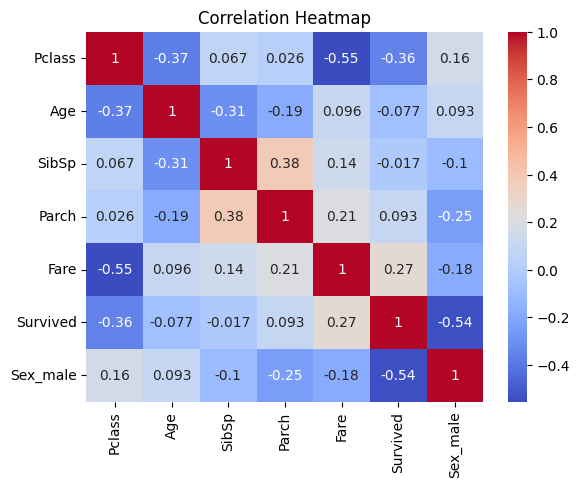

In [14]:
# Visualize the correlation between numerical variables
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Spliting Dataset

In [15]:
# Selecting relevant columns
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male']
target = 'Survived'

X = titanic_df.drop(target, axis=1)
y = titanic_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Pipeline

In [16]:
# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),         # Step 1: Standardize features by removing the mean and scaling to unit variance
    ('classifier', RandomForestClassifier())  # Step 2: Random Forest classifier for classification tasks
])

# Logistic Regression Pipeline
  # Step 1: Standardize features by removing the mean and scaling to unit variance
  # Step 2: Logistic Regression for classification tasks
lr_pipeline = Pipeline([
    ("scalar", StandardScaler()),
    ("classifier", LogisticRegression())
])

# SVM Pipeline
  # Step 1: Standardize features by removing the mean and scaling to unit variance
  # Step 2: Support Vector Classifier (SVC) for classification tasks
svm_pipeline = Pipeline([
    ("scalar", StandardScaler()),
    ("classifier", SVC())
])


### Parameter Grids

In [17]:
# Define parameter grids for Random Forest classifier
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],  # Step 1: Number of trees in the forest [100, 200, 300]
    'classifier__max_depth': [5, 10, 15]          # Step 2: Maximum depth of the tree  [5, 10, 15]
}

# Define parameter grids for Logistic Regression classifier
  # Step 1: C: Inverse of regularization strength; smaller values specify stronger regularization; Use: [0.1, 1, 10]
  # Step 2: penalty: Type of penalty; Use: 'l1' for Lasso
  # Step 3: solver: Algorithm to use in the optimization problem; Us: ['liblinear', 'saga']
param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1'],
    'classifier__solver': ['liblinear', 'saga']

}




# Define parameter grids for SVM classifier
  # Step 1: C: Regularization parameter; Use: [0.1, 1, 10]
  # Step 2: kernal: Kernel type to be used in the algorithm; Use: ['linear', 'rbf']
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']

}



# Define the scoring metrics you want to use
scoring = {
    'accuracy': make_scorer(accuracy_score),         # Scoring based on accuracy_score
    'f1_score': make_scorer(f1_score)                # Scoring based on F1_score
}


### GridSearchCV

In [18]:
# Create GridSearchCV instance for Random Forest algorithm
# Parameters:
# Random Forest pipeline, param_grid_rf, 5-fold cross-validation (cv=5), scoring metrics specified in scoring dictionary
# Refit the model based on the F1-score to get the best model
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring=scoring, refit='f1_score',  n_jobs=-1)

# Create GridSearchCV instance for Logistic Regression algorithm
# Step 1: Perform grid search using Logistic Regression pipeline
# Step 2: Use parameter combinations defined in param_grid_lr
# Step 3: Use 5-fold cross-validation (cv=5) for model evaluation
# Step 4: Use scoring metrics specified ealier and  n_jobs=-1
# Step 5: Refit the model based on the F1-score to get the best model
grid_search_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=5, scoring=scoring, refit='f1_score',  n_jobs=-1)

# Create GridSearchCV instance for SVM algorithm
# Step 1: Perform grid search using SVM pipeline
# Step 2: Use parameter combinations defined in param_grid_svm
# Step 3: Use 5-fold cross-validation (cv=5) for model evaluation
# Step 4: Use scoring metrics specified ealier and  n_jobs=-1
# Step 5: Refit the model based on the F1-score to get the best model
grid_search_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring=scoring, refit='f1_score',  n_jobs=-1)


In [19]:
# Fit the Random Forest model
grid_search_rf.fit(X_train, y_train)

# Fit the Logistic Regression model
grid_search_lr.fit(X_train, y_train)

# Fit the SVM model
grid_search_svm.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             refit='f1_score',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1_score': make_scorer(f1_score, response_method='predict')})

In [20]:
# Get the best parameters for Random Forest based on F1 score
best_params_rf = grid_search_rf.best_params_

# Get the best parameters for Logistic Regression based on F1 score
best_params_lr = grid_search_lr.best_params_

# Get the best parameters for SVM based on F1 score
best_params_svm = grid_search_svm.best_params_


In [21]:
# Access the results for Random Forest with both scoring metrics
results_rf = grid_search_rf.cv_results_

# Access the results for Logistic Regression with both scoring metrics
results_lr = grid_search_lr.cv_results_

# Access the results for SVM with both scoring metrics
results_svm = grid_search_svm.cv_results_


### Results

In [22]:
# Print the results for Random Forest
print("Random Forest Results:")
print("Accuracy scores:", results_rf['mean_test_accuracy'])  # Print mean_test_accuracy
print("F1 scores:", results_rf['mean_test_f1_score'])        # Print mean F1 scores
print("\nBest Parameters for Random Forest based on F1:", best_params_rf)  # Print best parameters based on F1 score


# Print the results for Logistic Regression
print("Logistic Regression Results:")
print("Accuracy scores:", results_lr['mean_test_accuracy'])  # Print mean_test_accuracy
print("F1 scores:", results_lr['mean_test_f1_score'])        # Print mean F1 scores
print("\nBest Parameters for Logistic Regression based on F1:", best_params_lr)  # Print best parameters based on F1 score
# Print mean_test_accuracy
# Print mean F1 scores
# Print best parameters based on F1 score


# Print the results for SVM
print("SVM Results:")
print("Accuracy scores:", results_svm['mean_test_accuracy'])  # Print mean_test_accuracy
print("F1 scores:", results_svm['mean_test_f1_score'])        # Print mean F1 scores
print("\nBest Parameters for SVM based on F1:", best_params_svm)  # Print best parameters based on F1 score
# Print mean_test_accuracy
# Print mean F1 scores
# Print best parameters based on F1 score


Random Forest Results:
Accuracy scores: [0.82665141 0.82489703 0.82663616 0.8284058  0.83894737 0.83540809
 0.82839054 0.82315789 0.81789474]
F1 scores: [0.77111787 0.76518784 0.77037578 0.77907156 0.79252314 0.78984196
 0.78286523 0.7756152  0.77237258]

Best Parameters for Random Forest based on F1: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Logistic Regression Results:
Accuracy scores: [0.79687262 0.798627   0.80739893 0.81089245 0.81264683 0.81440122]
F1 scores: [0.74542357 0.74110637 0.75639261 0.75960233 0.76242365 0.76419145]

Best Parameters for Logistic Regression based on F1: {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
SVM Results:
Accuracy scores: [0.79162471 0.8056598  0.79162471 0.81967963 0.79162471 0.83540809]
F1 scores: [0.72962373 0.74354068 0.72962373 0.76344627 0.72962373 0.79578341]

Best Parameters for SVM based on F1: {'classifier__C': 10, 'classifier__kernel': 'rbf'}


In [23]:
# keys present in the results_svm
results_svm.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_classifier__C', 'param_classifier__kernel', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_test_f1_score', 'split1_test_f1_score', 'split2_test_f1_score', 'split3_test_f1_score', 'split4_test_f1_score', 'mean_test_f1_score', 'std_test_f1_score', 'rank_test_f1_score'])

In [24]:
# Extract the mean test accuracy and test accuracy scores for Random Forest
mean_test_accuracy_rf = results_rf['mean_test_accuracy']  # Mean test accuracy scores
test_accuracy_rf = grid_search_rf.score(X_test, y_test)   # Test accuracy score on the test set

# Extract the mean test accuracy and test accuracy scores for Logistic Regression
# Mean test accuracy scores
# Test accuracy score on the test set
mean_test_accuracy_lr = results_lr['mean_test_accuracy']  # Mean test accuracy scores
test_accuracy_lr = grid_search_lr.score(X_test, y_test)   # Test accuracy score on the test set
# Extract the mean test accuracy and test accuracy scores for SVM
# Mean test accuracy scores
# Test accuracy score on the test set
mean_test_accuracy_svm = results_svm['mean_test_accuracy']  # Mean test accuracy scores
test_accuracy_svm = grid_search_svm.score(X_test, y_test)   # Test accuracy score on the test set

In [25]:
# Create a dataframe
data = {
    'Algorithm': ['Random Forest', 'Logistic Regression', 'SVM'],
    'Mean Test Accuracy': [np.mean(mean_test_accuracy_rf), np.mean(mean_test_accuracy_lr), np.mean(mean_test_accuracy_svm)],
    'Test Accuracy': [test_accuracy_rf, test_accuracy_lr, test_accuracy_svm]
}

pd.DataFrame(data)


,Algorithm,Mean Test Accuracy,Test Accuracy
0,Random Forest,0.827821,0.745455
1,Logistic Regression,0.806807,0.666667
2,SVM,0.805937,0.730435


### Build a function with the code

In [26]:
def evaluate_classifier(name, pipeline, param_grid, scoring, X_train, y_train, X_test, y_test):

    print(f'Model name: {name} \n')
    # Create a GridSearchCV instance for the pipeline
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='f1_score')

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Make predictions on the test set
    test_predictions = grid_search.predict(X_test)

    # Calculate accuracy and F1 score on the test set
    accuracy = accuracy_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions)

    # Print test results
    print("Test Accuracy:", accuracy)
    print("Test F1 Score:", f1)
    print


In [27]:
# Call the function for Random Forest
evaluate_classifier('rf', rf_pipeline, param_grid_rf, scoring, X_train, y_train, X_test, y_test)


# Call the function for Logistic Regression
evaluate_classifier('lr', lr_pipeline, param_grid_lr, scoring, X_train, y_train, X_test, y_test)


# Call the function for SVM
evaluate_classifier('svm', svm_pipeline, param_grid_svm, scoring, X_train, y_train, X_test, y_test)


Model name: rf 

Test Accuracy: 0.7972027972027972
Test F1 Score: 0.7387387387387387
Model name: lr 

Test Accuracy: 0.7482517482517482
Test F1 Score: 0.6666666666666666
Model name: svm 

Test Accuracy: 0.7832167832167832
Test F1 Score: 0.7304347826086957


### MLOps and tracking the results - Optional

In [28]:
pip install scikit-learn wandb

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.7 MB/s eta 0:00:00a 0:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
import wandb

def evaluate_classifier(name, pipeline, param_grid, scoring, X_train, y_train, X_test, y_test):


    # Initialize W&B
    wandb.init(name=name, project='project_ENSF_611')


    # Create a GridSearchCV instance for the pipeline
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='f1_score')

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Log the results to W&B
    wandb.log({'Algorithm': name})
    wandb.log({"Best F1 Score": grid_search.best_score_})
    wandb.log({"Best Parameters": grid_search.best_params_})

    # Make predictions on the test set
    test_predictions = grid_search.predict(X_test)

    # Calculate accuracy and F1 score on the test set
    accuracy = accuracy_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions)

    # Log test results to W&B
    wandb.log({"Test Accuracy": accuracy})
    wandb.log({"Test F1 Score": f1})

    # Print test results
    print("Test Accuracy:", accuracy)
    print("Test F1 Score:", f1)

In [30]:
# Call the function for Random Forest
evaluate_classifier('rf', rf_pipeline, param_grid_rf, scoring, X_train, y_train, X_test, y_test)

# Call the function for Logistic Regression
evaluate_classifier('lr' ,lr_pipeline, param_grid_lr, scoring, X_train, y_train, X_test, y_test)


# Call the function for SVM
evaluate_classifier('svm', svm_pipeline, param_grid_svm, scoring, X_train, y_train, X_test, y_test)


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: ERROR API key must be 40 characters long, yours was 5
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /Users/ben/.netrc


Test Accuracy: 0.7902097902097902
Test F1 Score: 0.7222222222222222


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Best F1 Score,▁
Test Accuracy,▁
Test F1 Score,▁
Algorithm,rf
Best F1 Score,0.78748
Test Accuracy,0.79021
Test F1 Score,0.72222


Test Accuracy: 0.7482517482517482
Test F1 Score: 0.6666666666666666


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Best F1 Score,▁
Test Accuracy,▁
Test F1 Score,▁
Algorithm,lr
Best F1 Score,0.76419
Test Accuracy,0.74825
Test F1 Score,0.66667


Test Accuracy: 0.7832167832167832
Test F1 Score: 0.7304347826086957
